#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import math
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [31]:
df = pd.read_csv("imdb_top_10000.txt",sep='\t')
df.head()

tt0111161 The Shawshank Redemption (1994)  1994   9.2  619479  142 mins.                       Crime|Drama
0  tt0110912             Pulp Fiction (1994)  1994   9.0  490065  154 mins.                    Crime|Thriller
1  tt0137523               Fight Club (1999)  1999   8.8  458173  139 mins.            Drama|Mystery|Thriller
2  tt0133093               The Matrix (1999)  1999   8.7  448114  136 mins.           Action|Adventure|Sci-Fi
3  tt1375666                Inception (2010)  2010   8.9  385149  148 mins.  Action|Adventure|Sci-Fi|Thriller
4  tt0109830             Forrest Gump (1994)  1994   8.7  368994  142 mins.              Comedy|Drama|Romance

In [32]:
df=pd.read_csv("imdb_top_10000.txt",sep ='\t',
               names=['imdbID', 'title', 'year', 'score','votes', 'runtime', 'genres']
)
df.head()

imdbID                            title  year  score   votes    runtime                            genres
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.                       Crime|Drama
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.                    Crime|Thriller
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.            Drama|Mystery|Thriller
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.           Action|Adventure|Sci-Fi
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.  Action|Adventure|Sci-Fi|Thriller

In [33]:
df.shape

(10000, 7)

In [34]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [35]:
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [36]:
df.dropna(subset=['genres'],inplace=True)

In [37]:
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     0
dtype: int64

## 2. Asking Questions

### What is best book of year 2010 by looking at scores?????

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [38]:
runtime =[int(runtime.split(" ")[0]) for runtime in df.runtime]
df['runtime']= runtime
df.head()


imdbID                            title  year  score   votes  runtime                            genres
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142                       Crime|Drama
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154                    Crime|Thriller
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139            Drama|Mystery|Thriller
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136           Action|Adventure|Sci-Fi
4  tt1375666                 Inception (2010)  2010    8.9  385149      148  Action|Adventure|Sci-Fi|Thriller

In [39]:
df.genres.head()

0                         Crime|Drama
1                      Crime|Thriller
2              Drama|Mystery|Thriller
3             Action|Adventure|Sci-Fi
4    Action|Adventure|Sci-Fi|Thriller
Name: genres, dtype: object

In [40]:
genre_set =set()
for genre in df.genres:
  list_genre=genre.split('|')
  genre_set.update(list_genre)

len(genre_set)

24

In [41]:
for genre in genre_set:
  df[genre] = [genre in row.split('|') for row in df.genres]

In [42]:
genre_df = df[list(genre_set)]
genre_df.head()

Animation  History  Thriller  Western  Romance  Biography  Action  Mystery    War  Sport  Horror  Reality-TV  Crime  Comedy  Music  Adventure  Fantasy  Family  Drama  Musical  Adult  Sci-Fi   News  Film-Noir
0      False    False     False    False    False      False   False    False  False  False   False       False   True   False  False      False    False   False   True    False  False   False  False      False
1      False    False      True    False    False      False   False    False  False  False   False       False   True   False  False      False    False   False  False    False  False   False  False      False
2      False    False      True    False    False      False   False     True  False  False   False       False  False   False  False      False    False   False   True    False  False   False  False      False
3      False    False     False    False    False      False    True    False  False  False   False       False  False   False  False       True    False   False  False    False  False    True  False      False
4      False    False      True    False    False      False    True    False  False  False   False       False  False   False  False       True    False   False  False    False  False    True  False      False

In [43]:
result=genre_df.sum()
result.sort_values(ascending=False)
result

Animation      314
History        358
Thriller      2832
Western        235
Romance       2441
Biography      394
Action        1891
Mystery       1009
War            512
Sport          288
Horror        1215
Reality-TV       1
Crime         1867
Comedy        3922
Music          371
Adventure     1313
Fantasy        916
Family         754
Drama         5697
Musical        260
Adult            9
Sci-Fi         897
News             1
Film-Noir       40
dtype: int64

In [44]:
df.drop(['genres'],axis=1,inplace=True)

In [45]:
df['title']=[t[:-7] for t in df.title]
df.head()

imdbID                     title  year  score   votes  runtime  Animation  History  Thriller  Western  Romance  Biography  Action  Mystery    War  Sport  Horror  Reality-TV  Crime  Comedy  Music  Adventure  Fantasy  Family  Drama  Musical  Adult  Sci-Fi   News  Film-Noir
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142      False    False     False    False    False      False   False    False  False  False   False       False   True   False  False      False    False   False   True    False  False   False  False      False
1  tt0110912              Pulp Fiction  1994    9.0  490065      154      False    False      True    False    False      False   False    False  False  False   False       False   True   False  False      False    False   False  False    False  False   False  False      False
2  tt0137523                Fight Club  1999    8.8  458173      139      False    False      True    False    False      False   False     True  False  False   False       False  False   False  False      False    False   False   True    False  False   False  False      False
3  tt0133093                The Matrix  1999    8.7  448114      136      False    False     False    False    False      False    True    False  False  False   False       False  False   False  False       True    False   False  False    False  False    True  False      False
4  tt1375666                 Inception  2010    8.9  385149      148      False    False      True    False    False      False    True    False  False  False   False       False  False   False  False       True    False   False  False    False  False    True  False      False

## 4. EDA

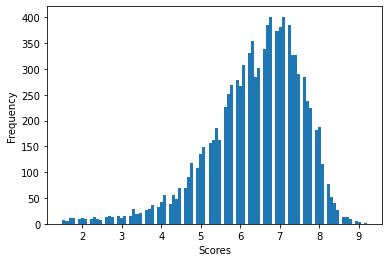

In [46]:
x = df.score
plt.hist(x,bins=100)
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.show()

In [47]:
small_df = df[['title', 'runtime']]
run_time = small_df['runtime']
print("Longest runtime")
print(run_time.max())
print("Shortest runtime")
print(run_time.min())
 


Longest runtime
450
Shortest runtime
0


## 5. Determining Best Movies

In [48]:
newdf = df.groupby('year')
newdf


In [49]:
newdf.size()

year
1950     31
1951     32
1952     37
1953     47
1954     39
       ... 
2007    495
2008    481
2009    417
2010    315
2011     98
Length: 62, dtype: int64

In [50]:
df_2010=newdf.get_group(2010)
df_2010.head()

imdbID           title  year  score   votes  runtime  Animation  History  Thriller  Western  Romance  Biography  Action  Mystery    War  Sport  Horror  Reality-TV  Crime  Comedy  Music  Adventure  Fantasy  Family  Drama  Musical  Adult  Sci-Fi   News  Film-Noir
4    tt1375666       Inception  2010    8.9  385149      148      False    False      True    False    False      False    True    False  False  False   False       False  False   False  False       True    False   False  False    False  False    True  False      False
100  tt1130884  Shutter Island  2010    8.0  171493      138      False    False      True    False    False      False   False     True  False  False   False       False  False   False  False      False    False   False   True    False  False   False  False      False
117  tt0947798      Black Swan  2010    8.3  150346      108      False    False      True    False    False      False   False     True  False  False   False       False  False   False  False      False    False   False   True    False  False   False  False      False
122  tt0435761     Toy Story 3  2010    8.6  144200      103       True    False     False    False    False      False   False    False  False  False   False       False  False    True  False       True     True    True  False    False  False   False  False      False
145  tt1250777        Kick-Ass  2010    8.0  146535      117      False    False     False    False    False      False    True    False  False  False   False       False  False    True  False       True    False   False  False    False  False   False  False      False

In [51]:
best_movie=df_2010[df_2010['score']==df_2010.score.max()]
best_movie['title']

4    Inception
Name: title, dtype: object

### Best movie of year 2010 is inception

## 6. Trends in Popularity of Genres

In [52]:
genre_df.sum()

Animation      314
History        358
Thriller      2832
Western        235
Romance       2441
Biography      394
Action        1891
Mystery       1009
War            512
Sport          288
Horror        1215
Reality-TV       1
Crime         1867
Comedy        3922
Music          371
Adventure     1313
Fantasy        916
Family         754
Drama         5697
Musical        260
Adult            9
Sci-Fi         897
News             1
Film-Noir       40
dtype: int64

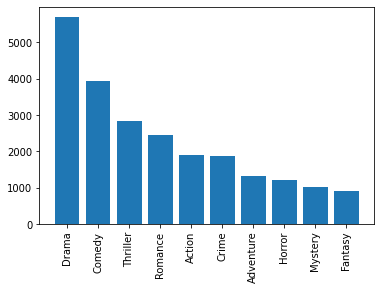

In [53]:
y =genre_df.sum().sort_values(ascending=False)[:10]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()